## Create visualization bar charts

In [26]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Display the charts inside the jupyter
%matplotlib inline

In [27]:
# Load the dataset data
pokemon = pd.read_csv('./data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [28]:
# Get the color palette to change the default color set of seaborn
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [29]:
# Get the values to order the plot
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [30]:
# Get the indexes to order the plot
gen_order = pokemon['generation_id'].value_counts().index
print(gen_order)

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')


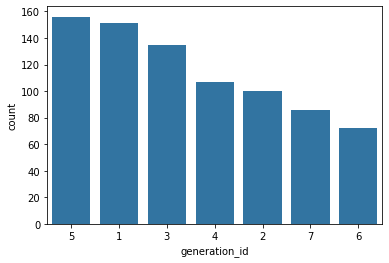

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

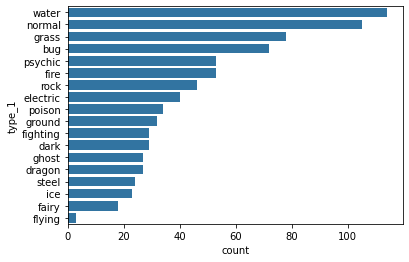

In [32]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

## Absolute vs Relative Frequency

By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of the proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

### Absolute Frequency

##### Data Wrangling Step

We will use the pandas.DataFrame.melt() method to unpivot a DataFrame from wide to long format.

It is essential to understand the parameters involved:

1. id_vars - It is a tuple representing the column(s) to use as identifier variables.
2. value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
3. var_name - It is a name of the new column.
4. value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.

Get more information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html)

In [35]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                         value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level', 
                          value_name = 'type').dropna()

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


#### Find the frequency of unique values in the type column

In [36]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [37]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

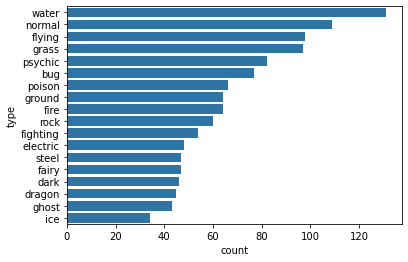

In [38]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Relative Frequency



In [40]:
# Get the sum of all not-null values in type column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Get the highest frequency
max_type_count = type_counts[0]

# Get the maximum proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [41]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [42]:
# Format the tick names
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

Text(0.5, 0, 'proportion')

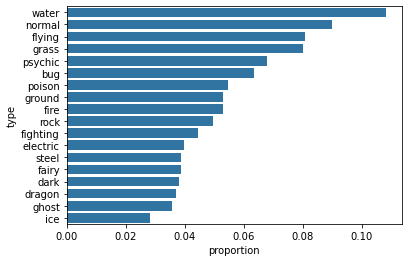

In [43]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Change the tick location and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

##### Printing the text in bars

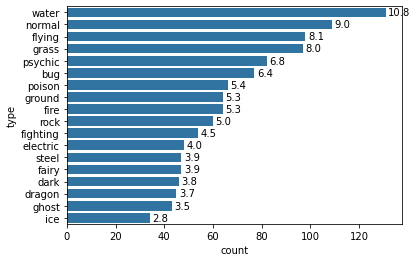

In [48]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string percentage on bar
    plt.text(count + 1, i, pct_string, va='center');